# Black hole quasinormal modes <br> using the asymptotic iteration method

H.T. Cho, A.S. Cornell, Jason Doukas and Wade Naylor, Class. Quantum Grav. 27 (2010) 155004 (12pp).  
https://iopscience.iop.org/article/10.1088/0264-9381/27/15/155004/meta


Equations 33 and 34 in the paper.

$\large \lambda_0(\xi) = -{1\over p} \left[ p' - {2 i\omega \over \kappa_1(\xi - \xi_1)}  -2 i \omega \right]$

$\large  s_0(\xi) = {1\over p} \left[ \ell(\ell +1) + 
(1-s^2) \left( 2M\xi - (4-s^2){\Lambda \over 6\xi^2} \right) + 
{i\omega \over \kappa_1(\xi - \xi_1)^2} \left( {i\omega \over \kappa_1} +1 \right) + (p' - 2i\omega) {i\omega \over \kappa_1(\xi - \xi_1)}  \right]  $

## Import AIM library 

In [1]:
# Python program to use AIM tools
from asymptotic import *

# a high precision math library: 
# it is used to obtain roots of a function with high precision.
import mpmath

# To draw potentials and its derivatie
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Definitions

### Variables

In [2]:
# symengine (symbolic) variables for lambda_0 and s_0 
En, r, xi, xi1, k1 = se.symbols(r'En, r, xi, xi_1, kappa_1')
l, s, M, Lambda = se.symbols(r'\ell, s, M, Lambda')

### Potential and some other functions

In [3]:
def Vf(r):
    """
    Master potential defined in Eq. 2 in the paper.
    """
    return f(r)*(l*(l+1)/r**2 + (1-s**2) * (2*M/r**3 - (4-s**2)*Lambda/6))

def f(r):
    """
    A function defined in Eq 3. with the cosmological constant Lambda .
    """
    return 1 - 2*M/r  - Lambda*r**2/3

def dVf(r0):
    """
    Derivative of the master potential.
    """
    return sym.diff(Vf(r), r).subs(r, r0)

def dVf_mpmath(r0):
    """
    Derivative of the master potential with numerical parameters.
    """
    dV = dVf(r).subs({l:nl, s: ns, Lambda: nLambda, M: nM})
    dVs = sym.lambdify(r, dV, 'mpmath')
    return dVs(r0)
    
def p(xi):
    """
    It is defined with Eq. 26 in the paper.
    """
    return xi**2 - 2*M*xi**3 - Lambda/3

def kappa(xi):
    """
    It is defined with Eq. 31 in the paper.
    """    
    return M*xi**2 - Lambda/(3*xi)

In [4]:
display(Latex('Master potential and its derivative:'))
symPrintFunc(Vf, (r,))
symPrintFunc(dVf, (r,))
display(Latex(r'Equation 26 in the paper.'))
symPrintFunc(p, (xi,))
display(Latex(r'$\kappa_1$ is the surface gravity at the event horizon $\xi_1$'))
symPrintFunc(kappa, (xi,))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

### $\lambda_0$ and $s_0$

In [5]:
def lambda_0(xi):
    return (6*(-se.I*En + xi - 3*M*xi**2))/(-3*xi**2 + 6*M*xi**3 + Lambda) + (2*se.I*En)/((xi - xi1)*k1)

def s_0(xi):
    return (2*En**2*xi**2*(-3*xi**2 + 6*M*xi**3 + Lambda) - \
            2*En*xi**2*(6*En*(xi - xi1) - 3*se.I*xi*(2*xi1 + xi*(-1 + 4*M*xi - 6*M*xi1)) + se.I*Lambda)*k1 + \
            (xi - xi1)**2*(-6*xi**2*(l + l**2 - 2*M*(-1 + s**2)*xi) + (4 - 5*s**2 + s**4)*Lambda)*k1**2)/ \
            (2*xi**2*(xi - xi1)**2*(-3*xi**2 + 6*M*xi**3 + Lambda)*k1**2)

## Case: $l = 2, s =2$

### $\Lambda = 0$

#### Numerical values for variables

In [6]:
# values of variables
nl, ns = 2, 2 # angular mom. and spin
nM = 1 # mass of the black hole

nLambda = o* 0

dprec=500
tol=1e-101
ft.ctx.dps = dprec
mpmath.mp.dps = dprec

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
#nxi1 = max(map(lambda x: sym.re(x), solhor)) # with infinite precision
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# pl0 and ps0 to put the numerical values of variables into lambda_0 and s_0. 
pl0 = lambda: {k1: nk1, xi1: nxi1, Lambda: nLambda, M: nM}
ps0 = lambda: {k1: nk1, xi1: nxi1, Lambda: nLambda, M: nM, l: nl, s: ns, }

#### Drawing of the Master potential and its derivative

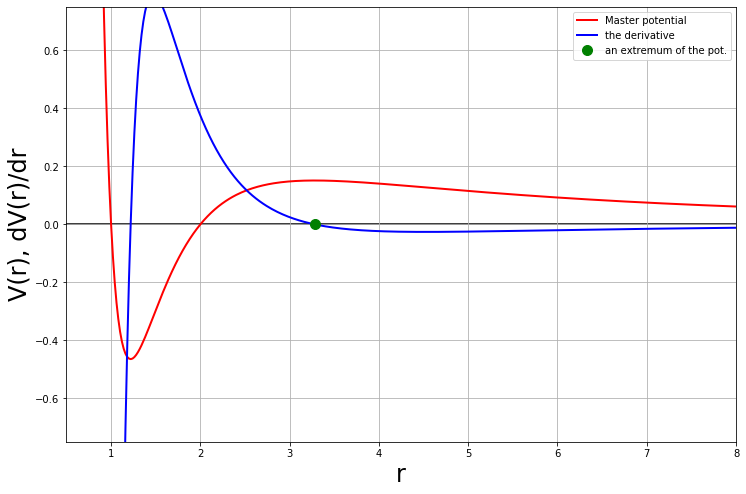

In [8]:
rspace = np.linspace(1e-10, 30, 1500)

Vf_numpy = sym.lambdify(r, Vf(r).subs({l:nl, s: ns, Lambda: nLambda, M: nM}), "numpy")
dVf_numpy = sym.lambdify(r, dVf_mpmath(r), "numpy")

Vf(r).subs({l:nl, s: ns, Lambda: nLambda, M: nM})


plt.figure(figsize=(12, 8))
plt.plot(rspace, Vf_numpy(rspace), color="red", lw=2, label="Master potential")
plt.plot(rspace, dVf_numpy(rspace), color="blue", lw=2, label="the derivative")
plt.plot(nr0, dVf_numpy(nr0), "go", ms=10, label="an extremum of the pot.")

plt.xlim(0.5, 8)
plt.ylim(-.75, .75)

plt.xlabel('r', fontsize=24)
plt.ylabel('V(r), dV(r)/dr', fontsize=24)

plt.axhline(color="black", zorder=-999)
plt.legend(loc="best")
plt.grid()
plt.show()

#### Initialize AIM solver

In [9]:
%%time
# pass lambda_0, s_0 and variable values to aim class
black_L00l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L00l2s2.display_parameters(pprec=7)
black_L00l2s2.display_l0s0(0, pprec=3)
black_L00l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

CPU times: user 91.2 ms, sys: 3.43 ms, total: 94.7 ms
Wall time: 96.4 ms


#### Calculation necessary coefficients

In [10]:
%%time
# create coefficients c0 and d0 for improved AIM
black_L00l2s2.c0()
black_L00l2s2.d0()
black_L00l2s2.cndn()

CPU times: user 16.5 s, sys: 93.5 ms, total: 16.6 s
Wall time: 16.6 s


#### The solution

In [11]:
%%time
black_L00l2s2.get_arb_roots()

CPU times: user 14.3 s, sys: 32.8 ms, total: 14.4 s
Wall time: 14.3 s


In [12]:
%%time
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L00l2s2.printAllRoots(showRoots='+r-i', printFormat="{:10.7f}", col=(0,3))

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001  0.3609169-0.0937215j  0.4144812-0.2973979j
0011  0.3736718-0.0889627j  0.3467437-0.2739338j  0.3011186-0.4770297j
0021  0.3736717-0.0889623j  0.3467118-0.2739145j  0.3010188-0.4783149j
0031  0.3736717-0.0889623j  0.3467110-0.2739149j  0.3010527-0.4782826j
0041  0.3736717-0.0889623j  0.3467110-0.2739149j  0.3010531-0.4782778j
0051  0.3736717-0.0889623j  0.3467110-0.2739149j  0.3010533-0.4782770j
0061  0.3736717-0.0889623j  0.3467110-0.2739149j  0.3010534-0.4782769j
0071  0.3736717-0.0889623j  0.3467110-0.2739149j  0.3010535-0.4782770j
CPU times: user 217 ms, sys: 13 µs, total: 217 ms
Wall time: 215 ms


### $\Lambda = 0.02$

In [13]:
%%time
# values of variables
nLambda = o* 2/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L02l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L02l2s2.display_parameters(pprec=7)
black_L02l2s2.display_l0s0(0, pprec=3)
black_L02l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L02l2s2.c0()
black_L02l2s2.d0()
black_L02l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L02l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.3283549  -0.0856613j    0.3690909  -0.2686128j
0011    0.3383914  -0.0817565j    0.3187579  -0.2492120j    0.2831809  -0.4292619j
0021    0.3383914  -0.0817564j    0.3187586  -0.2491967j    0.2827376  -0.4294769j
0031    0.3383914  -0.0817564j    0.3187587  -0.2491966j    0.2827324  -0.4294843j
0041    0.3383914  -0.0817564j    0.3187587  -0.2491966j    0.2827322  -0.4294841j
0051    0.3383914  -0.0817564j    0.3187587  -0.2491966j    0.2827322  -0.4294841j
0061    0.3383914  -0.0817564j    0.3187587  -0.2491966j    0.2827322  -0.4294841j
0071    0.3383914  -0.0817564j    0.3187587  -0.2491966j    0.2827322  -0.4294841j
CPU times: user 52.4 s, sys: 308 ms, total: 52.7 s
Wall time: 52.6 s


### $\Lambda = 0.04$

In [14]:
%%time
# values of variables
nLambda = o* 4/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L04l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L04l2s2.display_parameters(pprec=7)
black_L04l2s2.display_l0s0(0, pprec=3)
black_L04l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L04l2s2.c0()
black_L04l2s2.d0()
black_L04l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L04l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.2915300  -0.0762555j    0.3204505  -0.2365696j
0011    0.2988947  -0.0732967j    0.2858378  -0.2217255j    0.2600628  -0.3771886j
0021    0.2988947  -0.0732967j    0.2858409  -0.2217241j    0.2599916  -0.3770924j
0031    0.2988947  -0.0732967j    0.2858409  -0.2217241j    0.2599919  -0.3770922j
0041    0.2988947  -0.0732967j    0.2858409  -0.2217241j    0.2599919  -0.3770922j
0051    0.2988947  -0.0732967j    0.2858409  -0.2217241j    0.2599919  -0.3770922j
0061    0.2988947  -0.0732967j    0.2858409  -0.2217241j    0.2599919  -0.3770922j
0071    0.2988947  -0.0732967j    0.2858409  -0.2217241j    0.2599919  -0.3770922j
CPU times: user 5min 12s, sys: 1.79 s, total: 5min 14s
Wall time: 5min 13s


### $\Lambda = 0.06$

In [15]:
%%time
# values of variables
nLambda = o* 6/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L06l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L06l2s2.display_parameters(pprec=7)
black_L06l2s2.display_l0s0(0, pprec=3)
black_L06l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L06l2s2.c0()
black_L06l2s2.d0()
black_L06l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L06l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.2484765  -0.0650221j    0.2667728  -0.1997838j
0011    0.2532892  -0.0630425j    0.2457417  -0.1897908j    0.2300666  -0.3191627j
0021    0.2532892  -0.0630425j    0.2457420  -0.1897910j    0.2300764  -0.3191573j
0031    0.2532892  -0.0630425j    0.2457420  -0.1897910j    0.2300764  -0.3191573j
0041    0.2532892  -0.0630425j    0.2457420  -0.1897910j    0.2300764  -0.3191573j
0051    0.2532892  -0.0630425j    0.2457420  -0.1897910j    0.2300764  -0.3191573j
0061    0.2532892  -0.0630425j    0.2457420  -0.1897910j    0.2300764  -0.3191573j
0071    0.2532892  -0.0630425j    0.2457420  -0.1897910j    0.2300764  -0.3191573j
CPU times: user 6min 29s, sys: 2.22 s, total: 6min 31s
Wall time: 6min 31s


### $\Lambda = 0.08$

In [16]:
%%time
# values of variables
nLambda = o* 8/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L08l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L08l2s2.display_parameters(pprec=7)
black_L08l2s2.display_l0s0(0, pprec=3)
black_L08l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L08l2s2.c0()
black_L08l2s2.d0()
black_L08l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L08l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.1949902  -0.0509151j    0.2041500  -0.1550700j
0011    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871197  -0.2502566j
0021    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871198  -0.2502570j
0031    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871198  -0.2502570j
0041    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871198  -0.2502570j
0051    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871198  -0.2502570j
0061    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871198  -0.2502570j
0071    0.1974823  -0.0498773j    0.1941148  -0.1497866j    0.1871198  -0.2502570j
CPU times: user 51.2 s, sys: 296 ms, total: 51.5 s
Wall time: 51.4 s


### $\Lambda = 0.09$

In [17]:
%%time
# values of variables
nLambda = o* 9/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L09l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L09l2s2.display_parameters(pprec=7)
black_L09l2s2.display_l0s0(0, pprec=3)
black_L09l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L09l2s2.c0()
black_L09l2s2.d0()
black_L09l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L09l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.1611362  -0.0419793j    0.1664529  -0.1273112j
0011    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
0021    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
0031    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
0041    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
0051    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
0061    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
0071    0.1626104  -0.0413665j    0.1607886  -0.1241522j    0.1570423  -0.2071172j
CPU times: user 6min 46s, sys: 2.64 s, total: 6min 49s
Wall time: 7min


### $\Lambda = 0.10$

In [18]:
%%time
# values of variables
nLambda = o* 10/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L10l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L10l2s2.display_parameters(pprec=7)
black_L10l2s2.display_l0s0(0, pprec=3)
black_L10l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L10l2s2.c0()
black_L10l2s2.d0()
black_L10l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L10l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.1173080  -0.0304594j    0.1194521  -0.0919654j
0011    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
0021    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
0031    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
0041    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
0051    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
0061    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
0071    0.1179164  -0.0302105j    0.1172432  -0.0906409j    0.1158764  -0.1511018j
CPU times: user 5min 45s, sys: 2.24 s, total: 5min 47s
Wall time: 5min 47s


### $\Lambda = 0.11$

In [19]:
%%time
# values of variables
nLambda = o* 11/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L11l2s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L11l2s2.display_parameters(pprec=7)
black_L11l2s2.display_l0s0(0, pprec=3)
black_L11l2s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L11l2s2.c0()
black_L11l2s2.d0()
black_L11l2s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L11l2s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.0372473  -0.0096242j    0.0373238  -0.0288985j
0011    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
0021    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
0031    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
0041    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
0051    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
0061    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
0071    0.0372699  -0.0096157j    0.0372493  -0.0288470j    0.0372081  -0.0480784j
CPU times: user 6min 7s, sys: 2.22 s, total: 6min 9s
Wall time: 6min 9s


## Case: $l = 3, s =2$

### $\Lambda = 0$

#### Numerical values for variables

In [20]:
# values of variables
nl, ns = 3, 2 # angular mom. and spin
nM = 1 # mass of the black hole

nLambda = o* 0

dprec=500
tol=1e-101
ft.ctx.dps = dprec
mpmath.mp.dps = dprec

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
#nxi1 = max(map(lambda x: sym.re(x), solhor)) # with infinite precision
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
# pl0 and ps0 to put the numerical values of variables into lambda_0 and s_0. 
pl0 = lambda: {k1: nk1, xi1: nxi1, Lambda: nLambda, M: nM}
ps0 = lambda: {k1: nk1, xi1: nxi1, Lambda: nLambda, M: nM, l: nl, s: ns, }

#### Drawing of the Master potential and its derivative

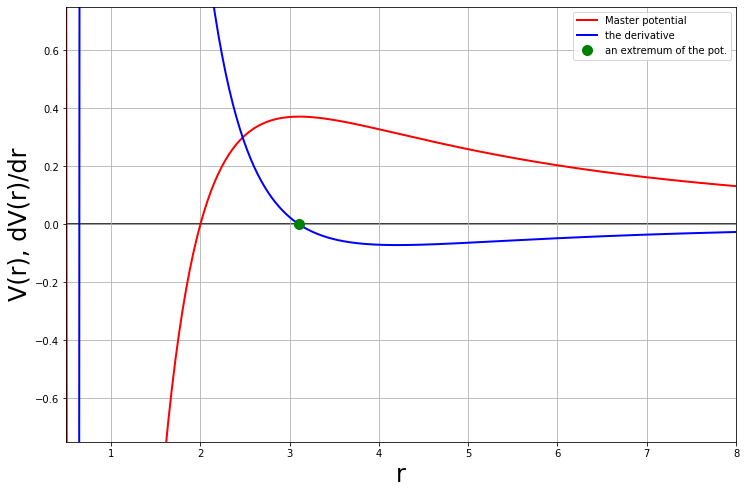

In [22]:
rspace = np.linspace(1e-10, 30, 1500)

Vf_numpy = sym.lambdify(r, Vf(r).subs({l:nl, s: ns, Lambda: nLambda, M: nM}), "numpy")
dVf_numpy = sym.lambdify(r, dVf_mpmath(r), "numpy")

Vf(r).subs({l:nl, s: ns, Lambda: nLambda, M: nM})


plt.figure(figsize=(12, 8))
plt.plot(rspace, Vf_numpy(rspace), color="red", lw=2, label="Master potential")
plt.plot(rspace, dVf_numpy(rspace), color="blue", lw=2, label="the derivative")
plt.plot(nr0, dVf_numpy(nr0), "go", ms=10, label="an extremum of the pot.")

plt.xlim(0.5, 8)
plt.ylim(-.75, .75)

plt.xlabel('r', fontsize=24)
plt.ylabel('V(r), dV(r)/dr', fontsize=24)

plt.axhline(color="black", zorder=-999)
plt.legend(loc="best")
plt.grid()
plt.show()

#### Initialize AIM solver

In [23]:
%%time
# pass lambda_0, s_0 and variable values to aim class
black_L00l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L00l3s2.display_parameters(pprec=7)
black_L00l3s2.display_l0s0(0, pprec=3)
black_L00l3s2.parameters(En, xi, nxi0, nmax=111, nstep=10, dprec=500, tol=1e-101)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

CPU times: user 80.4 ms, sys: 60 µs, total: 80.5 ms
Wall time: 81.7 ms


#### Calculation necessary coefficients

In [24]:
%%time
# create coefficients c0 and d0 for improved AIM
black_L00l3s2.c0()
black_L00l3s2.d0()
black_L00l3s2.cndn()

CPU times: user 2min 20s, sys: 768 ms, total: 2min 21s
Wall time: 2min 21s


#### The solution

In [25]:
%%time
black_L00l3s2.get_arb_roots()

CPU times: user 1min 31s, sys: 217 ms, total: 1min 31s
Wall time: 1min 31s


In [26]:
%%time
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L00l3s2.printAllRoots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.5911685  -0.0980648j    0.6261972  -0.3015236j
0011    0.5994433  -0.0927031j    0.5826454  -0.2813016j    0.5517855  -0.4790778j
0021    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516845  -0.4790922j
0031    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790927j
0041    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790928j
0051    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790928j
0061    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790928j
0071    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790928j
0081    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790928j
0091    0.5994433  -0.0927030j    0.5826438  -0.2812981j    0.5516849  -0.4790928j
0101    0.5994433  -0.0927030j    0.5826438  -

### $\Lambda = 0.02$

In [27]:
%%time
# values of variables
nLambda = o* 2/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L02l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L02l3s2.display_parameters(pprec=7)
black_L02l3s2.display_l0s0(0, pprec=3)
black_L02l3s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L02l3s2.c0()
black_L02l3s2.d0()
black_L02l3s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L02l3s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.5365207  -0.0887419j    0.5637064  -0.2717185j
0011    0.5431149  -0.0844957j    0.5307438  -0.2553644j    0.5070445  -0.4320831j
0021    0.5431149  -0.0844957j    0.5307443  -0.2553631j    0.5070154  -0.4320588j
0031    0.5431149  -0.0844957j    0.5307443  -0.2553631j    0.5070153  -0.4320588j
0041    0.5431149  -0.0844957j    0.5307443  -0.2553631j    0.5070153  -0.4320588j
0051    0.5431149  -0.0844957j    0.5307443  -0.2553631j    0.5070153  -0.4320588j
0061    0.5431149  -0.0844957j    0.5307443  -0.2553631j    0.5070153  -0.4320588j
0071    0.5431149  -0.0844957j    0.5307443  -0.2553631j    0.5070153  -0.4320588j
CPU times: user 31.5 s, sys: 264 ms, total: 31.8 s
Wall time: 31.7 s


### $\Lambda = 0.04$

In [28]:
%%time
# values of variables
nLambda = o* 4/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L04l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L04l3s2.display_parameters(pprec=7)
black_L04l3s2.display_l0s0(0, pprec=3)
black_L04l3s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L04l3s2.c0()
black_L04l3s2.d0()
black_L04l3s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L04l3s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.4751298  -0.0782844j    0.4949005  -0.2387318j
0011    0.4800575  -0.0751464j    0.4716580  -0.2263950j    0.4550094  -0.3807826j
0021    0.4800575  -0.0751464j    0.4716583  -0.2263948j    0.4550106  -0.3807731j
0031    0.4800575  -0.0751464j    0.4716583  -0.2263948j    0.4550106  -0.3807731j
0041    0.4800575  -0.0751464j    0.4716583  -0.2263948j    0.4550106  -0.3807731j
0051    0.4800575  -0.0751464j    0.4716583  -0.2263948j    0.4550106  -0.3807731j
0061    0.4800575  -0.0751464j    0.4716583  -0.2263948j    0.4550106  -0.3807731j
0071    0.4800575  -0.0751464j    0.4716583  -0.2263948j    0.4550106  -0.3807731j
CPU times: user 53.1 s, sys: 376 ms, total: 53.5 s
Wall time: 53.4 s


### $\Lambda = 0.06$

In [29]:
%%time
# values of variables
nLambda = o* 6/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L06l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L06l3s2.display_parameters(pprec=7)
black_L06l3s2.display_l0s0(0, pprec=3)
black_L06l3s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L06l3s2.c0()
black_L06l3s2.d0()
black_L06l3s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L06l3s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.4038715  -0.0662061j    0.4167558  -0.2011021j
0011    0.4071752  -0.0641396j    0.4021705  -0.1928074j    0.3920515  -0.3227696j
0021    0.4071752  -0.0641396j    0.4021706  -0.1928074j    0.3920528  -0.3227693j
0031    0.4071752  -0.0641396j    0.4021706  -0.1928074j    0.3920528  -0.3227693j
0041    0.4071752  -0.0641396j    0.4021706  -0.1928074j    0.3920528  -0.3227693j
0051    0.4071752  -0.0641396j    0.4021706  -0.1928074j    0.3920528  -0.3227693j
0061    0.4071752  -0.0641396j    0.4021706  -0.1928074j    0.3920528  -0.3227693j
0071    0.4071752  -0.0641396j    0.4021706  -0.1928074j    0.3920528  -0.3227693j
CPU times: user 51.2 s, sys: 360 ms, total: 51.6 s
Wall time: 51.4 s


### $\Lambda = 0.08$

In [30]:
%%time
# values of variables
nLambda = o* 8/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L08l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L08l3s2.display_parameters(pprec=7)
black_L08l3s2.display_l0s0(0, pprec=3)
black_L08l3s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L08l3s2.c0()
black_L08l3s2.d0()
black_L08l3s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L08l3s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.3160308  -0.0514590j    0.3227388  -0.1556829j
0011    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108032  -0.2524504j
0021    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108033  -0.2524505j
0031    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108033  -0.2524505j
0041    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108033  -0.2524505j
0051    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108033  -0.2524505j
0061    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108033  -0.2524505j
0071    0.3178048  -0.0503821j    0.3154946  -0.1512490j    0.3108033  -0.2524505j
CPU times: user 6min 26s, sys: 2.29 s, total: 6min 29s
Wall time: 6min 28s


### $\Lambda = 0.09$

In [31]:
%%time
# values of variables
nLambda = o* 9/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L09l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L09l3s2.display_parameters(pprec=7)
black_L09l3s2.display_l0s0(0, pprec=3)
black_L09l3s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L09l3s2.c0()
black_L09l3s2.d0()
black_L09l3s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L09l3s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.2607670  -0.0422812j    0.2647636  -0.1276435j
0011    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
0021    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
0031    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
0041    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
0051    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
0061    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
0071    0.2618425  -0.0416439j    0.2605716  -0.1249688j    0.2579976  -0.2084119j
CPU times: user 5min 22s, sys: 2.02 s, total: 5min 24s
Wall time: 5min 24s


### $\Lambda = 0.10$

In [32]:
%%time
# values of variables
nLambda = o* 10/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L10l3s2 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L10l3s2.display_parameters(pprec=7)
black_L10l3s2.display_l0s0(0, pprec=3)
black_L10l3s2.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L10l3s2.c0()
black_L10l3s2.d0()
black_L10l3s2.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L10l3s2.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.1895354  -0.0305759j    0.1912054  -0.0920840j
0011    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
0021    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
0031    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
0041    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
0051    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
0061    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
0071    0.1899943  -0.0303145j    0.1895170  -0.0909507j    0.1885554  -0.1516089j
CPU times: user 6min 18s, sys: 2.34 s, total: 6min 20s
Wall time: 6min 20s


### $\Lambda = 0.11$

In [33]:
%%time
# values of variables
nLambda = o* 11/100

sr0 = 3 # initial search point of the root of the der. pot.
nr0 = sym.S(mpmath.findroot(dVf_mpmath, sr0, tol=tol))
nxi0 = o* 1/nr0

solhor = sym.solve(p(xi).subs({Lambda: nLambda, M:nM}), xi)
nxi1 = sym.N(max(map(lambda x: sym.re(x), solhor)), dprec)
nk1 = kappa(nxi1).subs({Lambda: nLambda, M: nM})

display(Math(r"r_0 = %.20f"%sym.N(nr0)))
display(Math(r"\xi_0 = %.20f"%sym.N(nxi0)))
display(Math(r"\xi_1 = %.20f"%sym.N(nxi1)))
display(Math(r"k_1 = %.20f"%sym.N(nk1)))


# pass lambda_0, s_0 and variable values to aim class
black_L11l2s3 = aim(lambda_0(xi), s_0(xi), pl0(), ps0())
black_L11l2s3.display_parameters(pprec=7)
black_L11l2s3.display_l0s0(0, pprec=3)
black_L11l2s3.parameters(En, xi, nxi0, nmax=71, nstep=10, dprec=500, tol=1e-101)

# create coefficients c0 and d0 for improved AIM
black_L11l2s3.c0()
black_L11l2s3.d0()
black_L11l2s3.cndn()

# the solution
print("iter" + (3*"{:^24s}").format(*("n=%s"%str(i) for i in range(1,4))))
print("_"*3*24)
black_L11l2s3.get_arb_roots(showRoots='+r-i', printFormat="  {:10.7f}", col=(0,3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

iter          n=1                     n=2                     n=3           
________________________________________________________________________
0001    0.0600733  -0.0096282j    0.0601373  -0.0289013j
0011    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
0021    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
0031    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
0041    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
0051    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
0061    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
0071    0.0600915  -0.0096189j    0.0600766  -0.0288567j    0.0600469  -0.0480945j
CPU times: user 5min 53s, sys: 2.25 s, total: 5min 55s
Wall time: 5min 55s
